### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [127]:
data = pd.read_csv('data/coupons.csv')

In [128]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [143]:
data.info()

# some duplicates found using all rows
print("Before removing duplicates:", data.shape)
df = data.drop_duplicates()
print("After removing duplicates:", df.shape)

# some missing data found in critical rows
missing_counts = df.isnull().sum().sort_values()
print(missing_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [185]:
# dropping unnecessary car column due to excessive NULLs and duplicate rows
df = data.drop_duplicates()
df = df.drop('car', axis=1)

# dropping rows that are missing critical data
df.dropna(subset=['Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', 'CoffeeHouse'], inplace=True)

# resetting index
df.reset_index(inplace=True)

# convert 'time' column to actual type using proper format
# df['time'] = pd.to_datetime(df['time'], format='%H%p')

# change 'age' column to numeric values where below21 : <= 20, 21: 21 to 25, 26: 26 to 30...50plus: >= 51
# df.loc[df.query('age == "below21"').index, 'age_n'] = 20
# df.loc[df.query('age == "50plus"').index, 'age_n'] = 51
# df.loc[df.query('age != "50plus" and age != "below21"').index, 'age_n'] = df['age']

# df['age_n'] = df['age_n'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007 entries, 0 to 12006
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 12007 non-null  int64 
 1   destination           12007 non-null  object
 2   passanger             12007 non-null  object
 3   weather               12007 non-null  object
 4   temperature           12007 non-null  int64 
 5   time                  12007 non-null  object
 6   coupon                12007 non-null  object
 7   expiration            12007 non-null  object
 8   gender                12007 non-null  object
 9   age                   12007 non-null  object
 10  maritalStatus         12007 non-null  object
 11  has_children          12007 non-null  int64 
 12  education             12007 non-null  object
 13  occupation            12007 non-null  object
 14  income                12007 non-null  object
 15  Bar                   12007 non-null

4. What proportion of the total observations chose to accept the coupon?
Answer: 56.8418% accepted the coupon.

In [137]:
df['Y'].value_counts(normalize=True)

Y
1    0.568418
0    0.431582
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

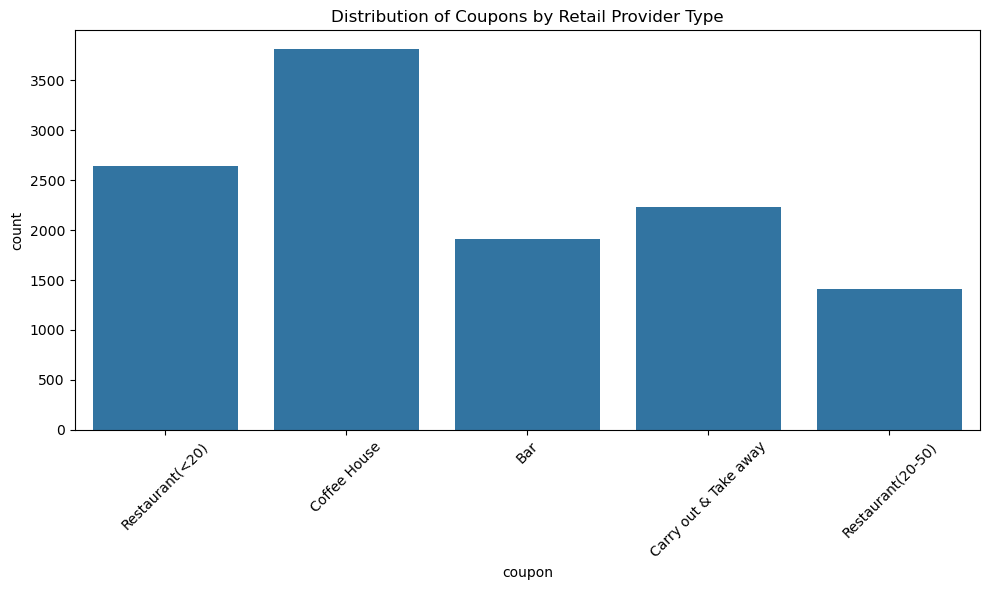

In [120]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='coupon')
plt.title('Distribution of Coupons by Retail Provider Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Coupons sent vs Temperature')

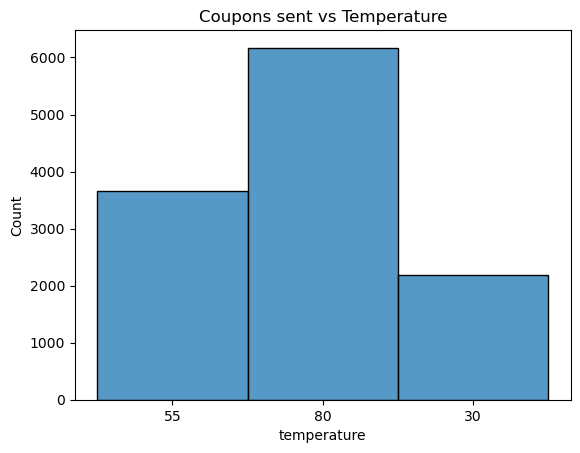

In [121]:
df_str_temp = df
df_str_temp['temperature'] = df['temperature'].astype(str)
sns.histplot(data=df_str_temp, x='temperature')
plt.title('Coupons sent vs Temperature')


Text(0.5, 1.0, 'Coupons sent vs Temperature during Weather Conditions')

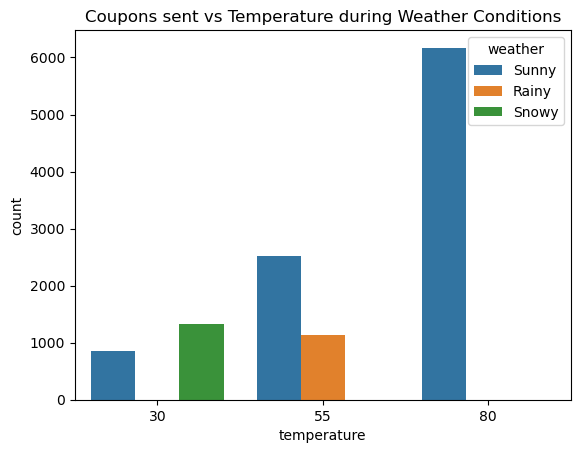

In [105]:
df_str_temp = df
df_str_temp['temperature'] = df['temperature'].astype(str)
x_order = ['30', '55', '80']
df_str_temp['temperature'] = pd.Categorical(df_str_temp['temperature'], x_order)
sns.countplot(data=df_str_temp, x='temperature', hue='weather')
plt.title("Coupons sent vs Temperature during Weather Conditions")

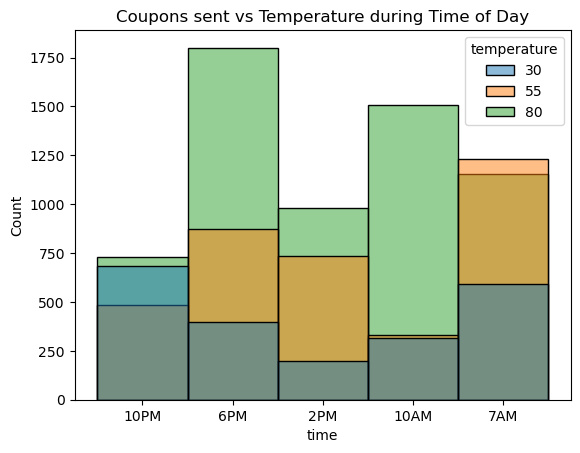

In [122]:
df_str_temp = df
df_str_temp['temperature'] = df['temperature'].astype(str)
x_order = ['10PM', '6PM', '2PM', '10AM', '7AM']
df_str_temp['time'] = pd.Categorical(df_str_temp['time'], x_order)
sns.histplot(data=df_str_temp, hue='temperature', hue_order=['30', '55', '80'], x='time')
plt.title("Coupons sent vs Temperature during Time of Day")
plt.show()

Text(0.5, 1.0, 'Coupons sent vs Temperature during Travel')

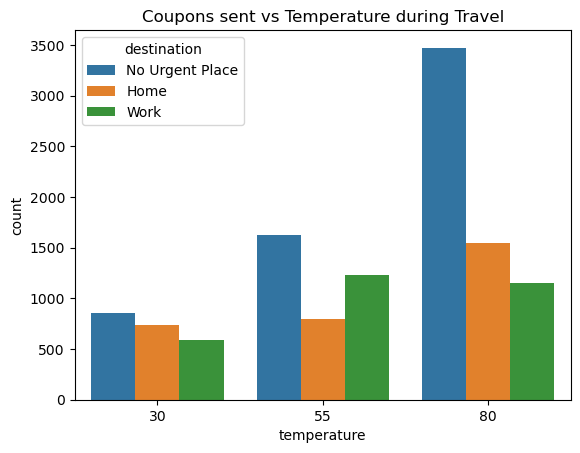

In [175]:
df_str_temp = df
df_str_temp['temperature'] = df['temperature'].astype(str)
x_order = ['30', '55', '80']
df_str_temp['temperature'] = pd.Categorical(df_str_temp['temperature'], x_order)
sns.countplot(data=df_str_temp, x='temperature', hue='destination')
plt.title("Coupons sent vs Temperature during Travel")

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

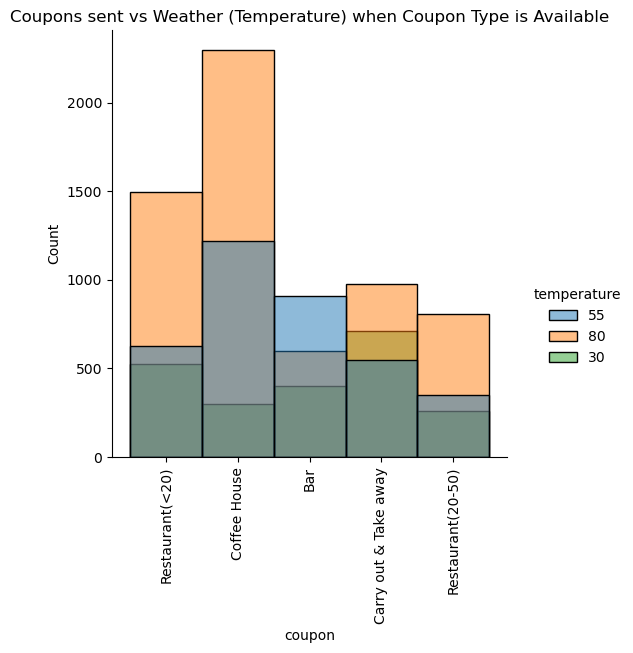

In [ ]:
df_str_temp = df
df_str_temp['temperature'] = df['temperature'].astype(str)
sns.displot(data=df_str_temp, hue='temperature', x='coupon')
plt.title("Coupons sent vs Weather (Temperature) when Coupon Type is Available")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'below21'),
  Text(1, 0, '21'),
  Text(2, 0, '26'),
  Text(3, 0, '31'),
  Text(4, 0, '36'),
  Text(5, 0, '41'),
  Text(6, 0, '46'),
  Text(7, 0, '50plus')])

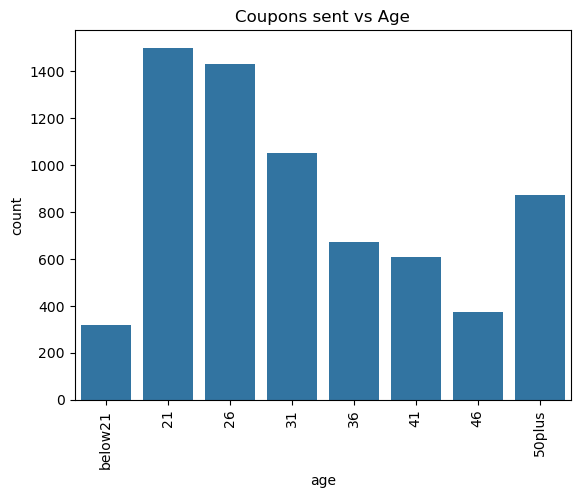

In [178]:
df_sortage = df.loc[df.query('Y == 1').index]
# df_sortage['age'] = df_sortage['age'].map({'below21':'< 21', '21':'21-25', '26':'26-30', '31':'31-35', '36':'36-40', '41':'41-45', '46':'46-50', '50plus':'> 50'})
# x_order = ['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '> 50']
x_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
df_sortage['age'] = pd.Categorical(df_sortage['age'], x_order)

sns.countplot(data=df_sortage, x='age')
plt.title("Coupons sent vs Age")
plt.xticks(rotation=90)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [162]:
bar_coupon_only_df = df.loc[df['coupon'] == 'Bar', ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']]
bar_coupon_only_df.reset_index(inplace=True)

bar_coupon_only_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   index                 1906 non-null   int64   
 1   destination           1906 non-null   object  
 2   passanger             1906 non-null   object  
 3   weather               1906 non-null   object  
 4   temperature           1906 non-null   int64   
 5   time                  1906 non-null   object  
 6   coupon                1906 non-null   object  
 7   expiration            1906 non-null   object  
 8   gender                1906 non-null   object  
 9   age                   1906 non-null   category
 10  maritalStatus         1906 non-null   object  
 11  has_children          1906 non-null   int64   
 12  education             1906 non-null   object  
 13  occupation            1906 non-null   object  
 14  income                1906 non-null   object  
 15  Bar 

2. What proportion of bar coupons were accepted?
Answer: 41.19% accepted coupon

In [98]:
print('Raw proportion of bar coupons accepted (1) vs rejected (0): ', bar_coupon_only_df['Y'].value_counts(normalize=True))
total_bar_coupons_accepted = bar_coupon_only_df['Y'].value_counts(normalize=False)[1]
print("Total bar coupons accepted: ", total_bar_coupons_accepted)
# bar_coupon_only_df['Y'].value_counts(normalize=False)
# bar_coupon_only_df['maritalStatus'].value_counts(normalize=True)
# bar_coupon_only_df['Bar'].value_counts(normalize=True)
# bar_coupon_only_df['age'].value_counts(normalize=True)


Raw proportion of bar coupons accepted (1) vs rejected (0):  Y
0    0.588143
1    0.411857
Name: proportion, dtype: float64
Total bar coupons accepted:  785


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [81]:
query_filter = '(Bar in ["never", "less1", "1~3"])'
filter_total = bar_coupon_only_df.query(query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
filter_remainder = bar_coupon_only_df.query("not " + query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
proportion_from_filter = (filter_total  / total_bar_coupons_accepted)  * 100
proportion_remainder = (filter_remainder / total_bar_coupons_accepted) * 100

print('Proportion of "bar" coupons accepted by people who go <= 3 time per month:', proportion_from_filter, '%')
print('Out of [', total_bar_coupons_accepted, '] "bar" coupons accepted')
print('Total after filter: [', filter_total, "]")
print('remainder of everyone else that goes to the bar [', filter_remainder, '] -> Proportion: ',  proportion_remainder, '%')



Proportion of "bar" coupons accepted by people who go <= 3 time per month: 81.27388535031848 %
Out of [ 785 ] "bar" coupons accepted
Total after filter: [ 638 ]
remainder of everyone else that goes to the bar [ 147 ] -> Proportion:  18.726114649681527 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [85]:
query_filter = '(Bar not in ["never", "less1"] and age not in ["below21", "21"])'
filter_total = bar_coupon_only_df.query(query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
filter_remainder = bar_coupon_only_df.query("not " + query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
proportion_from_filter = (filter_total  / total_bar_coupons_accepted)  * 100
proportion_remainder = (filter_remainder / total_bar_coupons_accepted) * 100

print('Proportion of accepted bar coupons for people that go > 1 time per month and are over 25: ', proportion_from_filter, '%')
print('Out of [', total_bar_coupons_accepted, '] "bar" coupons accepted')
print('Total after filter: [', filter_total, "]")
print('remainder of everyone else that goes to the bar [', filter_remainder, '] -> Proportion: ',  proportion_remainder, '%')


Proportion of accepted bar coupons for people that go > 1 time per month and are over 25:  35.4140127388535 %
Out of [ 785 ] "bar" coupons accepted
Total after filter: [ 278 ]
remainder of everyone else that goes to the bar [ 507 ] -> Proportion:  64.5859872611465 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [87]:
query_filter = '(Bar not in ["never", "less1"] and passanger not in ["Alone", "Kid(s)"] and occupation not in ["Farming Fishing & Forestry"])'
filter_total = bar_coupon_only_df.query(query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
filter_remainder = bar_coupon_only_df.query("not " + query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
proportion_from_filter = (filter_total  / total_bar_coupons_accepted)  * 100
proportion_remainder = (filter_remainder / total_bar_coupons_accepted) * 100

print('Proportion of accepted bar coupons for people that go > 1 time per month with an adult passanger and have an occupation outside of "farming, fishing or forrestry": \n', proportion_from_filter, '%')
print('Out of [', total_bar_coupons_accepted, '] "bar" coupons accepted')
print('Total after filter: [', filter_total, "]")
print('remainder of everyone else that goes to the bar [', filter_remainder, '] -> Proportion: ',  proportion_remainder, '%')



Proportion of accepted bar coupons for people that go > 1 time per month with an adult passanger and have an occupation outside of "farming, fishing or forrestry": 
 17.197452229299362 %
Out of [ 785 ] "bar" coupons accepted
Total after filter: [ 135 ]
remainder of everyone else that goes to the bar [ 650 ] -> Proportion:  82.80254777070064 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [88]:
query_filter = '(Bar not in ["never", "less1"] and passanger not in ["Alone", "Kid(s)"] and maritalStatus not in ["Widowed"])'
filter_total = bar_coupon_only_df.query(query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
filter_remainder = bar_coupon_only_df.query("not " + query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
proportion_from_filter = (filter_total  / total_bar_coupons_accepted)  * 100
proportion_remainder = (filter_remainder / total_bar_coupons_accepted) * 100

print('Proportion of accepted bar coupons for people that go > 1 time per month with an adult passanger and are not widowed": \n', proportion_from_filter, '%')
print('Out of [', total_bar_coupons_accepted, '] "bar" coupons accepted')
print('Total after filter: [', filter_total, "]")
print('remainder of everyone else that goes to the bar [', filter_remainder, '] -> Proportion: ',  proportion_remainder, '%\n\n')


query_filter = '(Bar not in ["never", "less1"] and age in ["below21", "21", "26"])'
filter_total = bar_coupon_only_df.query(query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
filter_remainder = bar_coupon_only_df.query("not " + query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
proportion_from_filter = (filter_total  / total_bar_coupons_accepted)  * 100
proportion_remainder = (filter_remainder / total_bar_coupons_accepted) * 100

print('Proportion of accepted bar coupons for people that go > 1 time per month and are younger than age 30": \n', proportion_from_filter, '%')
print('Out of [', total_bar_coupons_accepted, '] "bar" coupons accepted')
print('Total after filter: [', filter_total, "]")
print('remainder of everyone else that goes to the bar [', filter_remainder, '] -> Proportion: ',  proportion_remainder, '%\n\n')


query_filter = '(RestaurantLessThan20 not in ["never", "less1", "1~3"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $374996", "$37500 - $49999"])'
filter_total = bar_coupon_only_df.query(query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
filter_remainder = bar_coupon_only_df.query("not " + query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
proportion_from_filter = (filter_total  / total_bar_coupons_accepted)  * 100
proportion_remainder = (filter_remainder / total_bar_coupons_accepted) * 100

print('Proportion of accepted bar coupons for people that go to cheap restaurants > 4 time per month and have an income < $50,000": \n', proportion_from_filter, '%')
print('Out of [', total_bar_coupons_accepted, '] "bar" coupons accepted')
print('Total after filter: [', filter_total, "]")
print('remainder of everyone else that goes to the bar [', filter_remainder, '] -> Proportion: ',  proportion_remainder, '%\n\n')



Proportion of accepted bar coupons for people that go > 1 time per month with an adult passanger and are not widowed": 
 17.197452229299362 %
Out of [ 785 ] "bar" coupons accepted
Total after filter: [ 135 ]
remainder of everyone else that goes to the bar [ 650 ] -> Proportion:  82.80254777070064 %


Proportion of accepted bar coupons for people that go > 1 time per month and are younger than age 30": 
 30.063694267515924 %
Out of [ 785 ] "bar" coupons accepted
Total after filter: [ 236 ]
remainder of everyone else that goes to the bar [ 549 ] -> Proportion:  69.93630573248407 %


Proportion of accepted bar coupons for people that go to cheap restaurants > 4 time per month and have an income < $50,000": 
 15.159235668789808 %
Out of [ 785 ] "bar" coupons accepted
Total after filter: [ 119 ]
remainder of everyone else that goes to the bar [ 666 ] -> Proportion:  84.8407643312102 %




7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Only 785 drivers out of 1906 used the bar coupons.  Out of the 785 drivers it appeared that drivers who made over $100,000 and drivers that made < $62,500 used the coupons the most.  It was difficult for me to accept the data regarding occupation in relation to income being that there were students and unemployed drivers shown as making $100,000 which didn't make any sense.  I could have filtere out those possibly used some of the student data but being that most students are potentially under the age of 21 I would think you would want to remove that demographic any way for legal reasons.  With regards to age people >=21 and < 36 did the bulk of the accepting anyway so not being able to use the the Student demographic was really a non-issue.

The best target scenario that I could not was was comparing "destination" and "outside temperature".  It was noted that as temperatures rised when people had not real urgency to go anywhere, why not the bar.  Similarly it was seen that when the temperature was not too hot and not too cold (55 deg) people, regardless of urgency, went to the bar more often when receiving a coupon.

In [184]:
# accepted bar coupons
print('Proportion (%) bar coupons accepted (1) vs rejected (0): ', bar_coupon_only_df['Y'].value_counts(normalize=True))
total_bar_coupons_accepted = bar_coupon_only_df['Y'].value_counts(normalize=False)[1]
print("Total number of bar coupons accepted is", total_bar_coupons_accepted, "out of", bar_coupon_only_df.shape[0])
# bar_coupon_only_df['Y'].value_counts(normalize=False)
# bar_coupon_only_df['maritalStatus'].value_counts(normalize=True)
# bar_coupon_only_df['income'].value_counts(normalize=True)

# by income and occupation
tmp_series = bar_coupon_only_df.loc[bar_coupon_only_df['Y']==1]
print("\nTotal bar coupons accepted vs", tmp_series['income'].value_counts(normalize=False))
print("\nTotal bar coupons accepted vs", tmp_series['occupation'].value_counts(normalize=False))

# by parents and non parents
barcoupon_accepted_wkids_series = bar_coupon_only_df.loc[bar_coupon_only_df.query('has_children == 1 and Y==1').index]
print("\nTotal bar coupons accepted by parents", barcoupon_accepted_wkids_series['age'].value_counts(normalize=False).sum())
barcoupon_accepted_nkids_series = bar_coupon_only_df.loc[bar_coupon_only_df.query('has_children == 0 and Y==1').index]
print(" vs non parents", barcoupon_accepted_nkids_series['age'].value_counts(normalize=False).sum())


Proportion (%) bar coupons accepted (1) vs rejected (0):  Y
0    0.588143
1    0.411857
Name: proportion, dtype: float64
Total number of bar coupons accepted is 785 out of 1906

Total bar coupons accepted vs income
$25000 - $37499     136
$100000 or More     134
$12500 - $24999     114
$50000 - $62499     101
$37500 - $49999      90
Less than $12500     73
$75000 - $87499      54
$62500 - $74999      46
$87500 - $99999      37
Name: count, dtype: int64

Total bar coupons accepted vs occupation
Student                                      114
Unemployed                                    87
Computer & Mathematical                       79
Sales & Related                               78
Management                                    58
Office & Administrative Support               50
Business & Financial                          41
Education&Training&Library                    38
Healthcare Support                            29
Arts Design Entertainment Sports & Media      29
Food Prepar

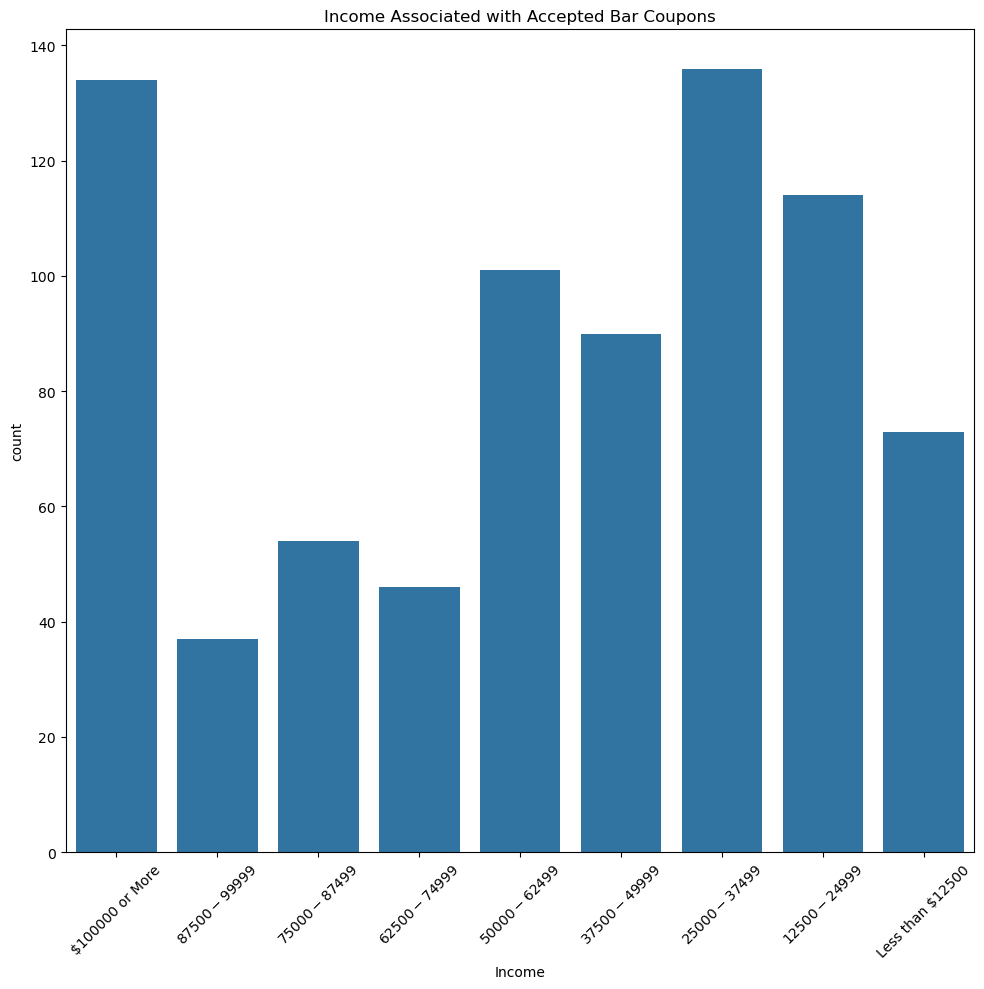

In [183]:
# df_income_order = bar_coupon_only_df.loc[bar_coupon_only_df.query('occupation in ["Unemployed", "Student", "Building & Grounds Cleaning & Maintenance"] and Y==1').index]
df_income_order = bar_coupon_only_df.loc[bar_coupon_only_df.query('Y==1').index]
income_order = ['$100000 or More', '$87500 - $99999', '$75000 - $87499', '$62500 - $74999', '$50000 - $62499', '$37500 - $49999', '$25000 - $37499', '$12500 - $24999', 'Less than $12500']
df_income_order['income'] = pd.Categorical(df_income_order['income'], income_order)

plt.figure(figsize=(10, 10))
sns.countplot(data=df_income_order, x='income')
plt.title("Income Associated with Accepted Bar Coupons")
# plt.ylabel('Income')
plt.xlabel('Income')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '< 21'),
  Text(1, 0, '21-25'),
  Text(2, 0, '26-30'),
  Text(3, 0, '31-35'),
  Text(4, 0, '36-40'),
  Text(5, 0, '41-45'),
  Text(6, 0, '46-50'),
  Text(7, 0, '> 50')])

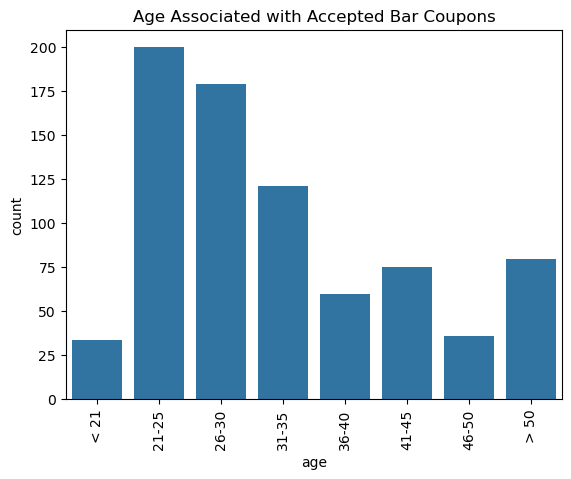

In [182]:
df_sortage = bar_coupon_only_df.loc[bar_coupon_only_df.query('Y==1').index]
df_sortage['age'] = df_sortage['age'].map({'below21':'< 21', '21':'21-25', '26':'26-30', '31':'31-35', '36':'36-40', '41':'41-45', '46':'46-50', '50plus':'> 50'})
x_order = ['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '> 50']
# x_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
df_sortage['age'] = pd.Categorical(df_sortage['age'], x_order)

sns.countplot(data=df_sortage, x='age')
plt.title("Age Associated with Accepted Bar Coupons")
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Coupons accepted in association with Temperature during Travel')

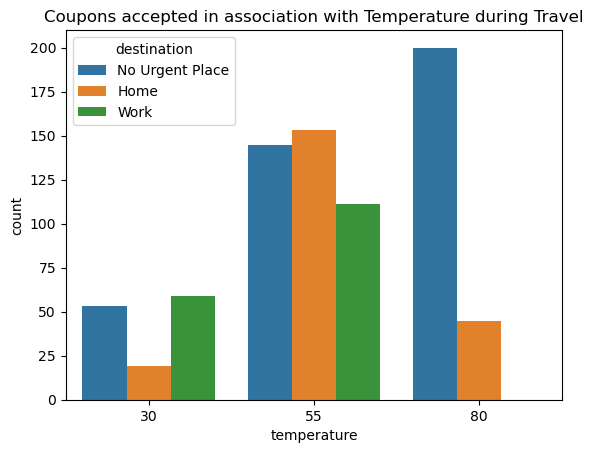

In [187]:
df_dest_temp = bar_coupon_only_df.loc[bar_coupon_only_df.query('Y==1').index]
df_dest_temp['temperature'] = df_dest_temp['temperature'].astype(str)
x_order = ['30', '55', '80']
df_dest_temp['temperature'] = pd.Categorical(df_dest_temp['temperature'], x_order)
sns.countplot(data=df_dest_temp, x='temperature', hue='destination')
plt.title("Coupons accepted in association with Temperature during Travel")

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  